## Bonus: Towards Multivariate Classifiers - Basalt Tectonic Setting Discrimination 

<div class="alert alert-info"><b>Note : </b>This example is modified from a notebook used in <a href="https://github.com/morganjwilliams/gs2020-diggingdeeper">a presentation for Goldschmidt 2020</a></div>


In geochemistry, classification is for historical reasons often treated as a graphical or two-dimensional problem for which the output includes a graphically-represented classification or discrimination diagram (driven by a need to visualize the data; e.g. [Pearce, 1973]). And while many of these diagrams have been practically useful for 'binning' and describing rocks, the divisions we use don't necessarily make sense in the natural world (e.g. consider the Total Alkali - Silica diagram). Modern statistical and machine learning techniques can readily be applied to make better use of the data dimensionality and move beyond the human-centric limitations. In this case a data driven approach instead considers divisions according to the natural clustering of data, where they exist.

**Key Messages**:
* Use the dimensionality you have
* Particularly if you're using major element data, use compositional transforms
* Where available, use metrics to understand estimated uncertainty and confidence
* Try to visualize and understand what's happening in lower dimensional spaces

### Searching for Enriched Basalts

This example is motivated by one of the research questions for my postdoc: where and when do we find the earliest examples of enriched basalts (analogous to modern day OIB)? Large magmatic nickel deposits are assocaited with enriched basaltic suites, and if we can generate spatio-temporal constraints on their genesis (particularly in geological time), we might be able to reduce the nickel exploration search space considerably. 

One approach to this question is to formulate it as a classification problem. Whole rock geochemistry is widely used to constrain the tectonic context in which magmatic rocks have been formed, with varying levels of success. Tectonic discrimination using whole-rock geochemical data is complicated by long geological histories, alteration, biased preservation and secular change. Notably, there is a lack of confidently identified oceanic crust in the Archean, suggesting finding OIB-like rocks is likely even more challenging. Most traditional tectonic discrimination diagrams use geochemical proxies to encode information about geological processes or (e.g. the "Pearce diagrams" which use Th/Yb, Nb/Yb and TiO2/Yb as proxies for subduction influence, source enrichment and depth of mantle melting respectively; [Pearce, 2008]), while others are designed to provide optimal discrimination for a specific scenario. While a wide variety of geochemical proxies can be used with relative confidence to discriminate between modern rocks, investigating primary geochemical contrast in ancient rocks (especially into the Archean) is typically considerd to require restriction of variables considered to those which are least effected by geological modification, i.e. immobile elements such as the High Field Strength Elements (HFSE) and Rare Earth Elements (REE). Overall the limited perspective of graphically-focused methods can lead to variable and uncertain classifications depending on the elements chosen, especially when applied into deep time. 

The example below goes through some of the first steps of exploring how we might be able to classify Paleoproteroizic and Archean basalts based on their geochemistry with a machine learning approach which capitalizes on the dimensionality of our datasets. But before we start digging into deep time (also see the [note on dealing with space and time](./00_overview.ipynb#Other-Opportunities-in-Data-Integration-and-Exploration) in the overview notebook), we first consider how well we can distinguish modern ocean island basalts. More so than the results of the prediction, we'd like to demonstrate and explore part of the process.

### Machine Tectonic Discrimination

Below we'll demonstrate a machine learning approach to classifying basalt geochemistry based on tectonic setting. We'll adapt a version of a support vector classifier, similar to those previously used for this problem ([Petrelli, 2016]; [Ueki, 2018]), and re-use the same 29-dimension tectonic discrimination dataset (just over 2000 samples taken from global repositories, each with majors, minors, traces and isotopes) from Ueki et al. (2018), modified to record the tectonic setting of each basalt in a 'Class' column.

First let's examine a well-used trace element discrimination diagram (the Th-Nb-Yb diagram; [Pearce, 2008]) to get some insight what some of the key issues with classification using only a few elements or dimension. This is one of number of classification and tectonic diagrams have been developed which use specific geochemical proxies to link rock and mineral geochemistry to geological processes and reservoirs (here Nb/Yb and Th/Yb which distinguish relative enrichment of the mantle and arc-related processes). As the diagram presents only two dimensions (or three, depending who you talk to), the data presented show only part of the whole picture. This reduced dimensionality means that when you compare rocks from a variety of settings, you're likely to see large degrees of overlap, as found by [Li et al. (2015)], and shown below. While the diagram is not particularly useful as a classification tool, the proxies used (ratios or otherwise) still provide useful 'features' which can be added to datasets before constructing a multivariate classifier.

| <img src="https://github.com/morganjwilliams/gs2020-diggingdeeper/raw/develop/img/Smithies2018Fig1.png" style="display:inline; margin: 0px 15px 15px 0px;" width="70%"/>|<img src="https://github.com/morganjwilliams/gs2020-diggingdeeper/raw/develop/img/Li2015Fig9.png" style="display:inline; margin: 0px 15px 15px 0px;" width="70%"/> |
|--|--|
| Figure from [Smithies (2018)] illustrating the main features of the Th-Yb-Nb diagram [Pearce (2008)], including the mantle or 'MORB-OIB array' and the 'modern arc array'. | Figure from [Li et al. (2015)], illustrating the significant degree of overlap in these two dimensions between different tectonic settings renders this approach futile for generalized discrimination.  |

Below we've loaded the dataset from [Ueki, 2018] and added the Nb/Yb and Th/Yb, and contoured data density for basalts from three different tectonic settings (at 30th, 50th and 80th percentiles). Notably, these data density contours largely line up with what we expect from the Pearce diagram.

<!--(BAB: Back Arc Basin, CA: Continental Arc, CFB: Continental Flood Basalt, IA: Island Arc, IOA: Intra-oceanic Arc, MOR: Mid-Ocean Ridge, OI: Ocean Island, OP: Oceanic Plateau) -->

[Pearce, 1973]: https://doi.org/10.1016/0012-821X(73)90129-5 "Pearce, J.A., Cann, J.R., 1973. Tectonic setting of basic volcanic rocks determined using trace element analyses. Earth and Planetary Science Letters 19, 290–300. doi: 10.1016/0012-821X(73)90129-5"

[Li et al. (2015)]: https://doi.org/10.1016/j.lithos.2015.06.022 "Li, C., Arndt, N.T., Tang, Q., Ripley, E.M., 2015. Trace element indiscrimination diagrams. Lithos 232, 76–83. "

[Smithies (2018)]: https://doi.org/10.1016/j.epsl.2018.01.034 "Smithies, R.H., Ivanic, T.J., Lowrey, J.R., Morris, P.A., Barnes, S.J., Wyche, S., Lu, Y.-J., 2018. Two distinct origins for Archean greenstone belts. Earth and Planetary Science Letters 487, 106–116."

[Pearce (2008)]: https://doi.org/10.1016/j.lithos.2007.06.016 "Pearce, J.A., 2008. Geochemical fingerprinting of oceanic basalts with applications to ophiolite classification and the search for Archean oceanic crust. Lithos 100, 14–48."

[Pearce, 2008]: https://doi.org/10.1016/j.lithos.2007.06.016 "Pearce, J.A., 2008. Geochemical fingerprinting of oceanic basalts with applications to ophiolite classification and the search for Archean oceanic crust. Lithos 100, 14–48."

[Petrelli, 2016]: https://doi.org/10.1007/s00410-016-1292-2 "Petrelli, M., Perugini, D., 2016. Solving petrological problems through machine learning: the study case of tectonic discrimination using geochemical and isotopic data. Contrib Mineral Petrol 171, 81."

[Ueki, 2018]: https://doi.org/10.1029/2017GC007401 "Ueki, K., Hino, H., Kuwatani, T., 2018. Geochemical Discrimination and Characteristics of Magmatic Tectonic Settings: A Machine-Learning-Based Approach. Geochemistry, Geophysics, Geosystems 19, 1327–1347."

In [1]:
import pandas as pd

import pyrolite

df = pd.read_csv("../data/basalts/Ueki2018.csv")
df.pyrochem.add_ratio("Th/Yb")
df.pyrochem.add_ratio("Nb/Yb");

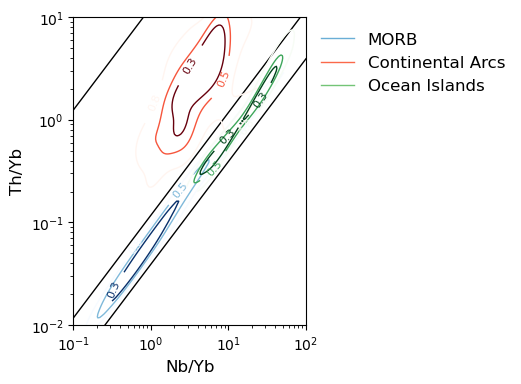

In [4]:
import matplotlib.pyplot as plt

import pyrolite.plot
from pyrolite.plot.templates.pearce import pearceThNbYb
from pyrolite.util.plot.legend import proxy_line

fig, ax = plt.subplots(1, figsize=(3, 4))
pearceThNbYb(ax)

proxies = []
labels = []
for setting, ID, cmap in [
    ("MORB", "MOR", "Blues"),
    ("Continental Arcs", "CA", "Reds"),
    ("Ocean Islands", "OI", "Greens"),
]:
    df.loc[(df.Class == ID), ["Nb/Yb", "Th/Yb"]].pyroplot.density(
        ax=ax, logx=True, logy=True, bins=100, contours=[0.3, 0.5, 0.8], cmap=cmap
    )
    labels.append(setting)
    proxies.append(proxy_line(color=plt.get_cmap(cmap)(0.5)))

ax.legend(
    proxies,
    labels,
    facecolor=None,
    frameon=False,
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=12,
);

However, when we add other tectonic settings to the diagram, we find something reminiscent of Li's diagram shown above, with a large degree of overlap:

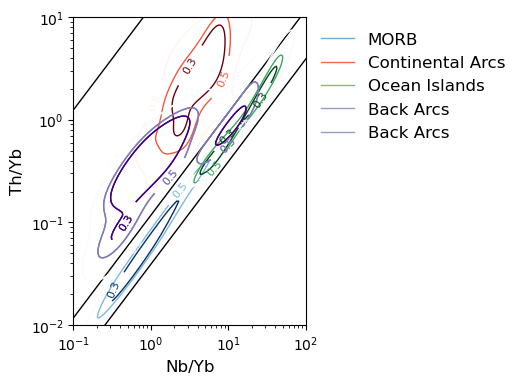

In [6]:
for setting, ID, cmap in [("Back Arcs", "BAB", "Purples")]:
    df.loc[(df.Class == ID), ["Nb/Yb", "Th/Yb"]].pyroplot.density(
        ax=ax, logx=True, logy=True, bins=100, contours=[0.3, 0.5, 0.8], cmap=cmap
    )
    labels.append(setting)
    proxies.append(proxy_line(color=plt.get_cmap(cmap)(0.5)))

ax.legend(
    proxies,
    labels,
    facecolor=None,
    frameon=False,
    bbox_to_anchor=(1, 1),
    loc="upper left",
    fontsize=12,
)
ax.figure

### Building and Testing Models

Below we'll build a machine tectonic discrimination 'pipeline', including necessary data pre-processing, training and selecting a classifier, and assessing the overall performance of this classification model.



There are a variety of types of classifiers we could use to achieve this, and here we've just picked one to work with which is relatively robust and can handle the dimensionality - a support vector classifier (SVC) with a radial basis function. We've included an illustrative example below for a dataset with two different groups of samples (two 'classes'), highlighting some of the differences between some commonly used classifiers.

| <img src="https://github.com/morganjwilliams/gs2020-diggingdeeper/raw/develop/img/ClassifierComparison.png" style="display:inline; margin: 0px 15px 15px 0px;" width="30%"/>  |
|:--:|
| Examples of decision surfaces of different classifier models for the same two-class dataset.|

#### Pre-Processing

To make the most of this dataset and build a more precise classifier, we need to make the most of the dataset dimensionality, as using more dimensions gives us more discriminating power. Making a machine learning classifier with these same two dimensions won't get us any further!

Most statistical and machine learning algorithms perform best on scaled and approximately normally-distributed data. As we're using major elements to build our classification model, we should **consider using compositional log-ratio transforms** ([Aitchison, 1984]) before we train our model, such that spurious correlation due to closure is minimized (note that we're *not* transforming the isotope ratios here). Also, we should **include a scaling step** to transform our input values such that they fall within $[-1, 1]$, such that magnitude differences between variables are accounted for.

[Aitchison, 1984]: https://doi.org/10.1007/BF01029316 "Aitchison, J., 1984. The statistical analysis of geochemical compositions. Journal of the International Association for Mathematical Geology 16, 531–564. doi: 10.1007/BF01029316"

#### Training a Model

Within our pipeline, we've specified a range of parameters for the classifier model ('hyperparameters') which it iterates through over a grid to find the most performant model. To ensure that our classifier is robust, we set aside independent subsets of our data for training and testing (used to fit and asses the model, respectively - typically about 30% for testing). We also use cross validation and ensure that separate subsets of the training data are used for fitting and validating models during model selection and tuning processes. Specifically here we used 5-fold stratified cross-validation, which splits the data into five separate representative subsets, and iterates through using each as the validation set. 

After this process has completed, the held-back test set can be used to independently verify the performance of the classifier model(s). If working as expected and with the desired accuracy and precision, we can extract the best classifier and put it to work on a new dataset! Below we train a classifier using our dataset, print out a quick diagrammatic summary (click for more details) and dig into the overall performance.

In [7]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

set_config(display="diagram")

from pyrolite.util.skl.pipeline import SVC_pipeline
from pyrolite.util.skl.select import CompositionalSelector
from pyrolite.util.skl.transform import CLRTransform, LogTransform
from pyrolite.util.skl.vis import plot_confusion_matrix

2024-11-11 18:13:05,161 pyrolite.util.skl.pipeline - WARNING: imbalanced-learn not installed


In [8]:
X = df[[c for c in df.columns if c != "Class"]]
y = df["Class"]

XX_train, XX_test, yy_train, yy_test = train_test_split(X, y, stratify=y, test_size=0.3)


gs = SVC_pipeline(
    verbose=0,
    probability=True,
    # scaler=StandardScaler(),
    transform=FeatureUnion(
        [
            (
                "abundances --> CLR",
                make_pipeline(CompositionalSelector(), CLRTransform()),
            ),
            (
                "isotopes",
                make_pipeline(CompositionalSelector(inverse=True), LogTransform()),
            ),
        ]
    ),
    param_grid=dict(
        svc__gamma=np.logspace(-2.3, -0.85, 5),
        svc__C=np.logspace(-0.5, 2, 5),  # limit C parameter to avoid overfitting
    ),
    n_jobs=1,
    cv=5,
)
gs.fit(XX_train, yy_train)
gs

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('featureunion',
                                        FeatureUnion(transformer_list=[('abundances '
                                                                        '--> '
                                                                        'CLR',
                                                                        Pipeline(steps=[('compositionalselector',
                                                                                         CompositionalSelector(columns={'Ac',
                                                                                                                        'Ac2O3',
                                                                                                                        'Ag',
                                                                                                                        'Ag2O',
                                                                                                                        'Ag2O3',
                                                                                                                        'AgO',
                                                                                                                        'AgO2',
                                                                                                                        'Al',
                                                                                                                        'Al2O',
                                                                                                                        'Al2O3',
                                                                                                                        'AlO',
                                                                                                                        'Ar',
                                                                                                                        'As',
                                                                                                                        'As2O',
                                                                                                                        'As2O3',
                                                                                                                        'As2O5',
                                                                                                                        'AsO',
                                                                                                                        'AsO2',
                                                                                                                        'At',
                                                                                                                        'At2O',
                                                                                                                        'At2O3',
                                                                                                                        'At2O5',
                                                                                                                        'At2O7',
                                                                                                                        'Au',
                                                                                                                        'Au2...
                                                                                                                        'Au2O5',
                                                                                                                        'AuO',
                                                                                                                        

Now that we've fit our classifier pipeline, we can extract the best estimator and see how it performed on the test data. While we could simply assess the overall accuracy by checking how many of the test samples it correctly classifies, we can go further and investigate how it does for each of the different tectonic settings within the test dataset. Below we've included a **confusion matrix**, which illustrates the proportion of the samples from a 'true' tectonic setting which are correctly classified (along the diagonal), and also what those which were incorrectly classified were misclassified as (off diagonals along the rows). For example, the back arc basin basalts tend to exhibit poor performance - and we can see that where they are misclassified they're commonly assigned as island arcs, intra-oceanic arcs, continental arcs and MORBs. This stems from geochemical overlap even in 20+ dimensions (as we've seen above in the extreme 2D case), which itself relates to the tectonic proximity and similarity of BAB compared to MORB and island arcs. Similarly, in some cases oceanic plateaus can be difficult to distinguish from continental flood basalts.

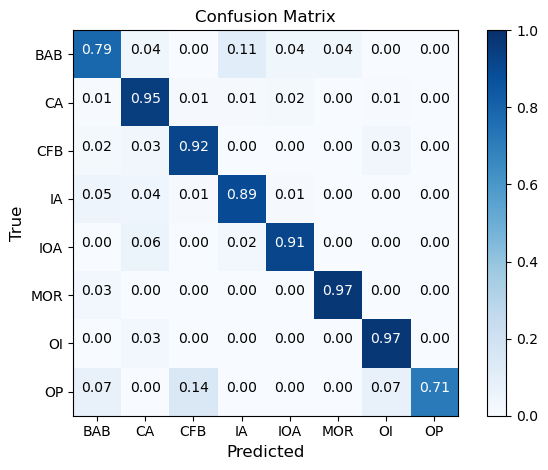

In [9]:
plot_confusion_matrix(gs, XX_test, yy_test, normalize=True);

While we've investigated the performance of this classifier a little based on the numbers, let's quickly check what this classifier looks like relative to our Pearce plot. Below we've included a plot colored by the *predicted* tectonic setting for each sample in our dataset, and can see that by exploiting the extra dimensionality, we've managed to untangle some of the overlaps in this space. 

In [10]:
pred = gs.predict(X)

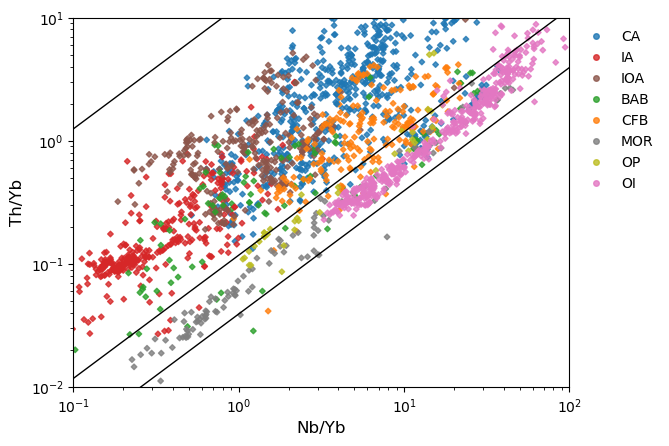

In [11]:
from pyrolite.plot.color import process_color

fig, ax = plt.subplots(1)
pearceThNbYb(ax)

colors = process_color(pred, cmap="tab10", alpha=0.8)["c"]
for ID in df.Class.unique():
    subdf = df.loc[df.Class == ID, :]
    subdf[["Nb/Yb", "Th/Yb"]].pyroplot.scatter(
        c=colors[df.Class == ID], ax=ax, s=8, alpha=0.8
    )

ax.legend(
    [
        proxy_line(c=coll.get_facecolors()[0], marker="o", ls="none")
        for coll in ax.collections
    ],
    df.Class.unique(),
    frameon=False,
    facecolor=None,
)
plt.show()

There's an extra dimension to this model which we haven't yet explored: uncertainty. While it's relatively straightforward to envisage uncertainty for a predicted variable when it's numeric, here we have a multi-class classification problem. When we built this classifier, we did so using a method which allows for estimation of the relative probability that each sample belongs to each tectonic setting (through 'Platt scaling' of the decision surface; [Platt, 2000]; [Lin, 2007]). While this isn't the most robust way to estimate classification probability, it does provide some useful information about relative certainty.

Below we've shown the estimated classification probabilities for the first few samples in our dataset across each of the eight tectonic settings, along with the true tectonic setting. Most samples are classified correctly with high certainties, for others the classification probability is distributed over multiple (typically geologically similar) settings. Where samples are incorrectly classified, it's typically with low certainty.

[Platt, 2000]: "" "Platt, J.C., 2000. Probabilistic Outputs for Support Vector Machines and Comparisons to Regularized Likelihood Methods, in: Advances in Large Margin Classifiers. MIT Press, pp. 61–74."

[Lin, 2007]:https://doi.org/10/ckf84q "Lin, H.-T., Lin, C.-J., Weng, R.C., 2007. A note on Platt’s probabilistic outputs for support vector machines. Mach Learn 68, 267–276."

In [12]:
samples = np.random.choice(np.arange(XX_test.shape[0]), 8, replace=False)
probs = pd.DataFrame(data=gs.predict_proba(XX_test)[samples], columns=gs.classes_) * 100
probs["True Tectonic Setting"] = yy_test.iloc[samples].tolist()
table = probs[probs.columns[::-1]].round(2)
table.style.background_gradient(cmap="Blues", axis=1)

,True Tectonic Setting,OP,OI,MOR,IOA,IA,CFB,CA,BAB
0,IA,0.070000,0.080000,0.120000,4.150000,89.160000,0.100000,2.060000,4.260000
1,OI,0.240000,97.480000,0.230000,0.160000,0.040000,1.230000,0.380000,0.240000
2,CA,0.040000,0.030000,0.020000,4.030000,0.160000,0.060000,95.340000,0.330000
3,OI,0.170000,97.180000,0.210000,0.130000,0.150000,0.470000,0.740000,0.960000
4,OI,2.470000,82.510000,1.340000,1.660000,0.320000,7.680000,2.910000,1.110000
5,CFB,1.340000,0.520000,0.100000,0.250000,0.440000,96.600000,0.510000,0.240000
6,CA,0.080000,0.040000,0.040000,0.060000,0.080000,0.190000,99.240000,0.270000
7,IOA,0.070000,0.050000,0.070000,72.820000,0.440000,0.070000,26.370000,0.130000


### What can we learn?

This example provides one some insight into the relative certainty with which we can classify modern basaltic rocks given a high-dimensional dataset. Overall we can approach the tectonic discrimination task with a relatively high degree of accuracy (and we can distinguish Ocean Island Basalts very well!), if we have all the data, and especially if we're using more than one sample to do so. It also highlights that in some cases the nature of source regions, magmatic and alteration processes results in some degree of 'overlap' meaning we can't always distinguish tectonic setting even for fresh rocks. 

By building probabilistic classifiers, we can use the multi-class classification probability outputs to better understand the model, the dataset that it is built on, and where our samples might fit in. We can provide some constraints for the maximal certainty with which we can make predictions overall, and also on a sample-by-sample basis.

The next example notebook ([Data Visualization](./012_datavis.ipynb)) illustrates some methods for using these outputs to visualize the relative certainty in these multi-class classification problems, as well as visualizations which attempt to compress the dimensionality of the dataset yet preserve the overall structure.

#### Limits: What We Haven't Accounted For

What we don't have in this model is any accounting for the fact that the target classes may have changed with time, that there may be classes or setting which existed in the past which are no longer present (or, alternatively, that some of these classes didn't exist in the past). Further, we've made a classifier based on a relatively large set of elements and isotopes. But what if we don't have all this data, or some it is unreliable - as is the case for older deformed and altered rocks. What does this reduction in useful dimensionality do to our chances of accurately distinguishing the tectonic settings? We'll expect a decrease in overall performance as we take out potentially unreliable or confounding fluid-mobile elements and isotopes which are otherwise useful in fresher modern rocks. Notably, the effect will be different for each of the tectonic setting classes - some of these are distinguishable by a set of a few elements and isotopes (we expect this is partially the case for ocean island basalts, which have distinct isotope systematics)! These effects are testable through repeating part of the process above, but for brevity we won't continue with this here.

Another aspect we haven't accounted for here is dataset shift - which in our case principally relates to i) the distribution of input variables (our elements and isotopes) which our model is trained on, and ii) 'concept shift' - or 'geological evolution' as it relates to the composition of basaltic (or otherwise) magma generated in a specific tectonic setting (in addition to the note above about tectonic settings changing!). There are methods for assessing the shift in independent variables or covariate shift (which itself is analogous to identifying where we're extrapolating our model beyond a reasonable threshold): for example, Kullback-Liebler divergence from a statistics point of view, or building a classifier to discriminate the input dataset from the training dataset from a machine learning point of view.). However, when it comes to concept shift, we know to expect it (it's part of one of our original questions..), and addressing it is challenging!

<!--

### Limits for Applying Models: Dataset Shift

* Covariate shift (shift in independent variables) - e.g. extrapolating model to data which is significantly different to the data it has been trained with
* Prior probability shift (e.g. imbalanced classes; distribution of predictor different between training and testing sets)
* Concept shift (~ non-stationarity) - something fundamental about the relationship between independent variables and predictor has changed (e.g geological time & evolution).

#### Identifying Covariate Shift

* A statistical approach: Kullback–Leibler divergence; useful for lower dimensions
* Which features are shifted? Multivariate vs individual features - implications of differences likely depend on models, but multivariate shift (e.g. data with a differing covariance matrix) could be a particular issue.
# Choose a threshold at which covariate shift is sufficiently great that results have to be excluded
-->

#### Applying Models as Research Tools

In a practical sense, classifiers like this can be used to extract samples from larger databases for closer inspection, and in some cases are best used as tools to refine our focus and highlight interesting samples and features!

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import umap

from pyrolite.util.plot.legend import proxy_line
from pyrolite.util.skl.vis import alphas_from_multiclass_prob

In [14]:
pred = gs.predict(X)
pred_proba = gs.predict_proba(X)

In [15]:
colors = process_color(pred, cmap="tab10")["c"]
colors[:, -1] = alphas_from_multiclass_prob(
    pred_proba, alpha=0.95
)  # append alphas to RGBA colours

In [16]:
threeDreducer = umap.UMAP(
    n_components=3,
    min_dist=0.1,
    n_neighbors=25,
    metric="manhattan",
)
threeDembedding = threeDreducer.fit_transform(
    make_pipeline(*[step[1] for step in gs.estimator.steps[:-1]]).fit_transform(X)
)

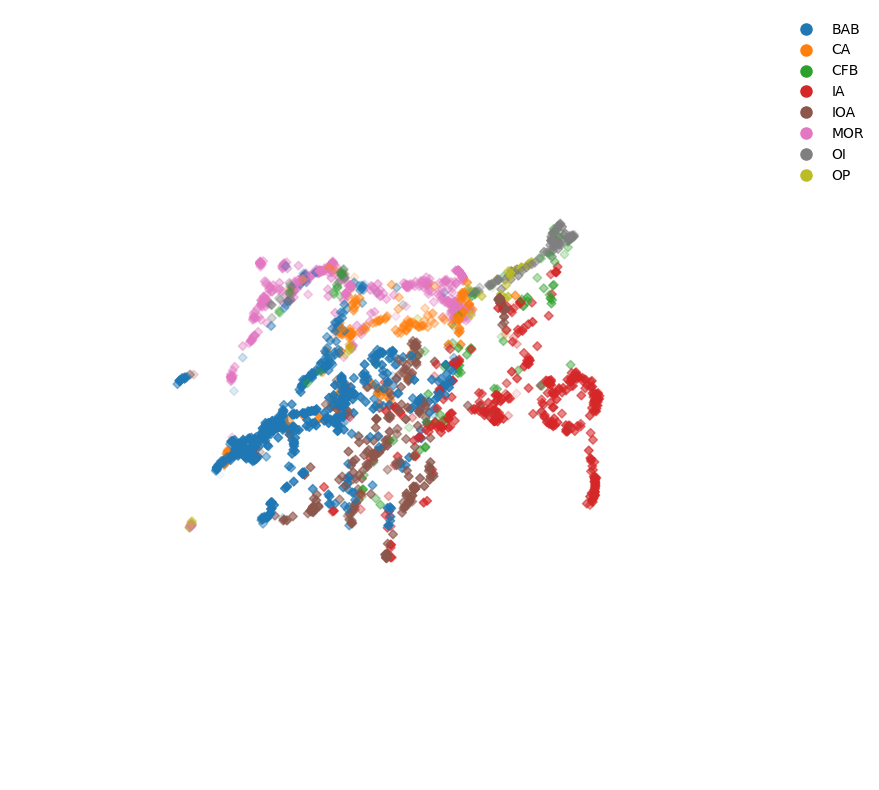

In [ ]:
%matplotlib widget
fig, ax = plt.subplots(1, subplot_kw={"projection": "3d"}, figsize=(10, 10))
ax.scatter(*threeDembedding.T, c=colors)  # 3D scatter diagram
proxies = {  # generate some proxies for legend items
    cls: proxy_line(color=col, marker="o", lw=0)
    for cls, col in zip(
        np.unique(pred), process_color(np.unique(pred), cmap="tab10")["c"]
    )
}
ax.legend(proxies.values(), proxies.keys(), markerscale=2)  # add the legend
ax.axis("off");# turn off the 3D axes, they aren't necessarily meaninful